In [35]:
import pandas as pd, matplotlib.pyplot as plt, geopandas as gpd, contextily as ctx, numpy as np, seaborn as sns

In [37]:
#Exploramos la base de datos
df = gpd.read_file(
    "C:\\Users\\palom\\Downloads\\Rosario F.xlsx"
)
df.head()
df.dtypes 

interview__key            object
METODO                    object
Coord1__Latitude         float64
Coord1__Longitude        float64
EDAD                      object
GENERO                    object
INT DE VOTO X ESPACIO     object
RADIO                     object
dtype: object

In [39]:
len(df) #Hay 372 casos

372

In [41]:
df.shape

(372, 8)

In [43]:
df.info() #Información de cantidad de casos, columnas, tipos y cantidad de memoria utilizada

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372 entries, 0 to 371
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   interview__key         372 non-null    object 
 1   METODO                 372 non-null    object 
 2   Coord1__Latitude       372 non-null    float64
 3   Coord1__Longitude      372 non-null    float64
 4   EDAD                   372 non-null    object 
 5   GENERO                 372 non-null    object 
 6   INT DE VOTO X ESPACIO  372 non-null    object 
 7   RADIO                  372 non-null    object 
dtypes: float64(2), object(6)
memory usage: 23.4+ KB


In [45]:
#Distribución de frecuencia absoluta de intención de votos por espacio
int_voto = df['INT DE VOTO X ESPACIO'].value_counts() 
print(int_voto) 
#También nos sirve para ver si hay datos perdidos (no hay)

INT DE VOTO X ESPACIO
JxC               90
FdT               80
NINGUNO/NOSABE    72
LIBERTARIOS       57
OTROS             35
PNK               26
FIT               12
Name: count, dtype: int64


In [47]:
#Distribución de frecuencia relativa porcentual de intención de voto por espacio
int_voto_porcentaje = df['INT DE VOTO X ESPACIO'].value_counts(normalize=True) * 100 #Multiplicamos por 100 porque si no solo muestra la frecuencia relativa
print(int_voto_porcentaje) 

INT DE VOTO X ESPACIO
JxC               24.193548
FdT               21.505376
NINGUNO/NOSABE    19.354839
LIBERTARIOS       15.322581
OTROS              9.408602
PNK                6.989247
FIT                3.225806
Name: proportion, dtype: float64


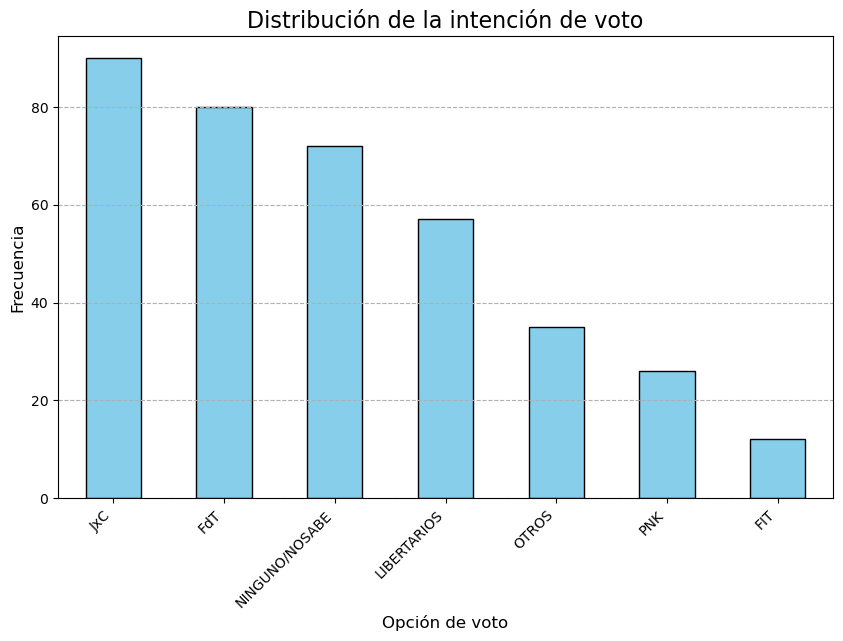

In [49]:
#Gráfico de barras
plt.figure(figsize=(10, 6))
int_voto.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribución de la intención de voto', fontsize=16)
plt.ylabel('Frecuencia', fontsize=12)
plt.xlabel('Opción de voto', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--')

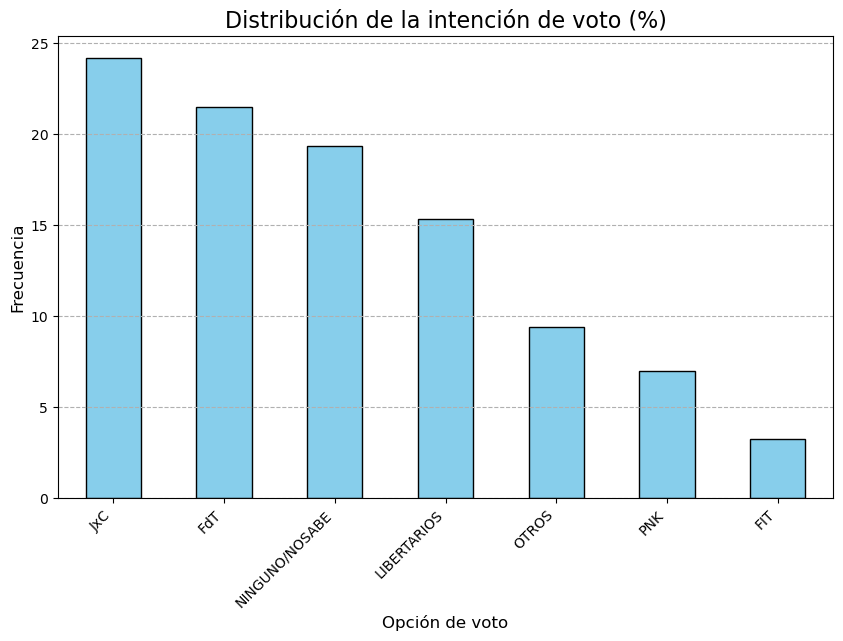

In [50]:
#Gráfico de barras porcentual
plt.figure(figsize=(10, 6))
int_voto_porcentaje.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribución de la intención de voto (%)', fontsize=16)
plt.ylabel('Frecuencia', fontsize=12)
plt.xlabel('Opción de voto', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--')

In [51]:
#Distribución de intención de voto según género
voto_genero = pd.crosstab(df['INT DE VOTO X ESPACIO'], df['GENERO']) 
print(voto_genero)

GENERO                 Femenino  Masculino  Otro
INT DE VOTO X ESPACIO                           
FIT                           5          5     2
FdT                          35         45     0
JxC                          42         48     0
LIBERTARIOS                  11         44     2
NINGUNO/NOSABE               40         28     4
OTROS                        19         15     1
PNK                          13         13     0


In [55]:
#Distribución de intención de voto según género (% al interior de cada espacio)
voto_genero_porcentaje = pd.crosstab(df['INT DE VOTO X ESPACIO'], df['GENERO'], normalize='index')*100
print(voto_genero_porcentaje)

GENERO                  Femenino  Masculino       Otro
INT DE VOTO X ESPACIO                                 
FIT                    41.666667  41.666667  16.666667
FdT                    43.750000  56.250000   0.000000
JxC                    46.666667  53.333333   0.000000
LIBERTARIOS            19.298246  77.192982   3.508772
NINGUNO/NOSABE         55.555556  38.888889   5.555556
OTROS                  54.285714  42.857143   2.857143
PNK                    50.000000  50.000000   0.000000


In [99]:
#Distribución de intención de voto según grupo etario
voto_edad = pd.crosstab(df['INT DE VOTO X ESPACIO'], df['EDAD']) 
print(voto_edad)

EDAD                   16 a 25  26 a 35  36 a 45  46 a 55  56 y mas
INT DE VOTO X ESPACIO                                              
FIT                          1        5        4        1         1
FdT                          7       13       23       13        24
JxC                          7        9       22       20        32
LIBERTARIOS                  7       12       16       10        12
NINGUNO/NOSABE               6       11       16       19        20
OTROS                        0        5        8       17         5
PNK                          0        6       10        3         7


In [101]:
#Distribución de intención de voto según grupo etario (% al interior de cada espacio)
voto_edad_porcentaje = pd.crosstab(df['INT DE VOTO X ESPACIO'], df['EDAD'], normalize='index')*100
print(voto_edad_porcentaje)

EDAD                     16 a 25    26 a 35    36 a 45    46 a 55   56 y mas
INT DE VOTO X ESPACIO                                                       
FIT                     8.333333  41.666667  33.333333   8.333333   8.333333
FdT                     8.750000  16.250000  28.750000  16.250000  30.000000
JxC                     7.777778  10.000000  24.444444  22.222222  35.555556
LIBERTARIOS            12.280702  21.052632  28.070175  17.543860  21.052632
NINGUNO/NOSABE          8.333333  15.277778  22.222222  26.388889  27.777778
OTROS                   0.000000  14.285714  22.857143  48.571429  14.285714
PNK                     0.000000  23.076923  38.461538  11.538462  26.923077


In [113]:
import folium
from folium.plugins import HeatMap

In [178]:
#Mapeo de densidad de entrevistados
df = df.dropna(subset=['Coord1__Latitude', 'Coord1__Longitude']) #Elimina valores Nan.

#Creamos el mapa:
mapa = folium.Map(location=[-32.9468, -60.6393], zoom_start=12) #Centramos el mapa en Rosario según sus coordenadas
coordenadas = df[['Coord1__Latitude', 'Coord1__Longitude']].values.tolist() #Crea una lista de coordenadas que contiene latitud y longitud
HeatMap(coordenadas).add_to(mapa) #Especificamos el tipo de mapa
mapa.save("C:\\Users\\palom\\Downloads\\mapa_densidad_rosario.html") #Guardamos el mapa como archivo HTML
print("Mapa de densidad creado. Ábrelo con un navegador.")

Mapa de densidad creado. Ábrelo con un navegador.


In [180]:
#Mapeo de densidad según intención de voto por espacio
mapa = folium.Map(location=[-32.9468, -60.6393], zoom_start=12)
categorias = df['INT DE VOTO X ESPACIO'].unique()

#Creamos una capa por categoría:
for categoria in categorias:
    mapa_espacios = df[df['INT DE VOTO X ESPACIO'] == categoria]
    coordenadas = mapa_espacios[['Coord1__Latitude', 'Coord1__Longitude']].values.tolist()
    capa = folium.FeatureGroup(name=f"Intención de voto: {categoria}")
    HeatMap(coordenadas).add_to(capa)
    capa.add_to(mapa)

# Agregamos un control de capas
folium.LayerControl().add_to(mapa)

# Guardamos el mapa como archivo HTML
mapa.save("C:\\Users\\palom\\Downloads\\mapa_densidad_espacios.html")

print("Mapa de densidad con filtros creado. Ábrelo con un navegador.")

Mapa de densidad con filtros creado. Ábrelo con un navegador.


In [182]:
#SE PODRÍA AGREGAR GRAFICOS DE BARRA U OTRO TIPO DE GRAFICO PARA GENERO Y EDAD
#O MAPAS PARA ESAS VARIABLES TAMBIÉN. 
#¿CORRELACION DE PODRÍA HACIENDOLAS NUMERIAS? A MI NO ME SALIO. 
#FALTA BUSCAR DATOS SECUNDARIOS COMO NIVEL DE ESTUDIOS